In [1]:
import nltk
import re
import pandas as pd
import numpy as np
import random

dataframe = pd.read_csv("Reviews.csv")
df = dataframe[dataframe['Score']!=3]


In [2]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)

In [4]:
df = df[df.HelpfulnessNumerator<=df.HelpfulnessDenominator]

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import  WordNetLemmatizer
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')
def clean_tags(sen):
    clean=re.compile('<.*?>')
    cleaned=re.sub(clean,'',sen)
    return cleaned
def clean_punctuations(sen):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sen)
    cleaned = re.sub(r'[,|.|)|(|\|/]',r'',cleaned)
    return cleaned

In [6]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [7]:
i=0
strin=''
positive=[]
negative=[]
finalstring=[]
s=''
for sent in df['Text'].values:
    filtered_sentences = []
    sent = clean_tags(sent)
    for a   in sent.split():
        for cleaned_words in clean_punctuations(a).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in  stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentences.append(s)
                    if(df['Score'].values)[i] ==1:
                        positive.append(s)
                    if(df['Score'].values)[i]==0:
                        negative.append(s)
                else:
                    continue
            else:
                continue
    strin = b" ".join(filtered_sentences)
    finalstring.append(strin)
    i+=1                    

In [8]:
df['Text']=finalstring

In [9]:
#TF-IDF 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Text'])
#Xtest_tfidf = tfidf.fit_transform(test_df['Clean_text'])

In [10]:
from sklearn.model_selection import train_test_split
Xtrain_tfidf, Xtest_tfidf, Y_train, Y_test = train_test_split(X_tfidf, df['Score'], test_size=0.25, random_state=12)

In [11]:
logreg_tfidf = LogisticRegression(C=10)
logreg_tfidf.fit(Xtrain_tfidf, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
def performance_summary(model, Xtrain, Xtest, Ytrain, Ytest):
    
    Ytrain_pred = model.predict(Xtrain)
    Ytest_pred = model.predict(Xtest)

    # model performance
    # accuracy score
    print('Training Accuracy:\n', accuracy_score(Ytrain, Ytrain_pred))
    print('\n')
    print('Test Accuracy:\n', accuracy_score(Ytest, Ytest_pred))
    print('\n')
    # classification report
    print('Classification Report training:\n', classification_report(Ytrain,Ytrain_pred))
    print('\n')
    print('Classification Report test:\n', classification_report(Ytest,Ytest_pred))
    conf_mat = confusion_matrix(Y_test, Ytest_pred)
    print(conf_mat)
    import seaborn as sns
    class_label = ["negative", "positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

****************************TF-IDF****************************
Training Accuracy:
 0.9420088749597259


Test Accuracy:
 0.9243104906472766


Classification Report training:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80     43051
           1       0.95      0.98      0.97    230077

    accuracy                           0.94    273128
   macro avg       0.91      0.86      0.88    273128
weighted avg       0.94      0.94      0.94    273128



Classification Report test:
               precision    recall  f1-score   support

           0       0.80      0.68      0.73     14059
           1       0.94      0.97      0.96     76984

    accuracy                           0.92     91043
   macro avg       0.87      0.82      0.85     91043
weighted avg       0.92      0.92      0.92     91043

[[ 9532  4527]
 [ 2364 74620]]


NameError: name 'plt' is not defined

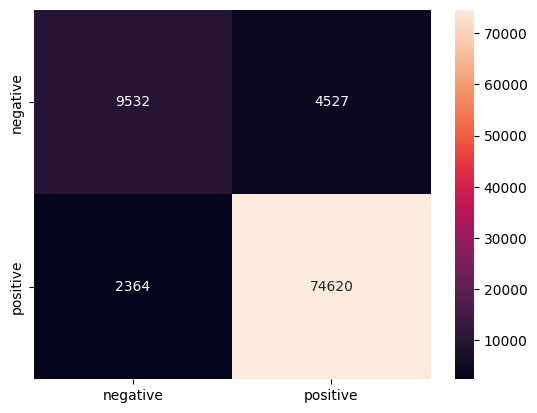

In [14]:
print('*'*28+'TF-IDF'+'*'*28)
performance_summary(logreg_tfidf, Xtrain_tfidf, Xtest_tfidf, Y_train, Y_test)

In [15]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(Xtrain_tfidf, Y_train)

XGBClassifier()

Training Accuracy:
 0.8738613397381447


Test Accuracy:
 0.8749162483661567


Classification Report training:
               precision    recall  f1-score   support

           0       0.90      0.23      0.36     43051
           1       0.87      1.00      0.93    230077

    accuracy                           0.87    273128
   macro avg       0.88      0.61      0.65    273128
weighted avg       0.88      0.87      0.84    273128



Classification Report test:
               precision    recall  f1-score   support

           0       0.88      0.22      0.35     14059
           1       0.87      0.99      0.93     76984

    accuracy                           0.87     91043
   macro avg       0.88      0.61      0.64     91043
weighted avg       0.88      0.87      0.84     91043

[[ 3078 10981]
 [  407 76577]]


NameError: name 'plt' is not defined

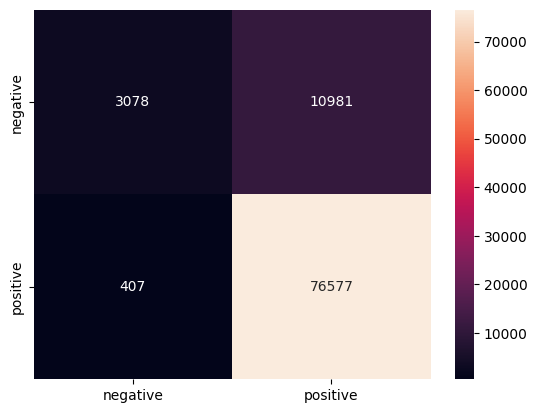

In [16]:
performance_summary(model, Xtrain_tfidf, Xtest_tfidf, Y_train,Y_test)